In [1]:
import numpy as np
from tqdm.notebook import tqdm
from random import choices
import seaborn as sns
from sklearn.metrics import mean_squared_log_error

Попробовал оптимизировать несколько метрик, на мой взгляд лучше всего работает L1 норма с небольшим штрафом за отрицательные значения в матрице корреляций
Если сделать большой штраф за отрицательные значения, то матрица в какой-то момент пререстанет подбираться и значение дисперсии будет делако от теоретического

In [68]:
m = 200
n = 100
p = 0.04
R = 0.01

N_ITERATIONS = 1 * 10 ** 5

In [69]:
# матрица корреляций, которую хотим получить
required_matrix = np.ones([n, n]) * R - np.diag([R - 1] * n)

# начальная матрица до переставления элементов
n_ones = round(p * m)
n_zeros = round(m * (1 - p))
start_matrix = np.concatenate([np.ones(n_ones), np.zeros(n_zeros)] * n).reshape(n, m).T

In [70]:
def true_var(p, R, n, m):
    var = n * p * (1 - p) * (1 + (n - 1) * R)
    return var

In [71]:
np.where(new_mat==0, 0, new_mat)

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [85]:

def RMSE(matrix):
    corr_mat = np.corrcoef(matrix, rowvar=False)
    corr_mat = np.where(corr_mat<0, corr_mat*3, corr_mat)
    return np.mean((corr_mat - required_matrix) ** 2)


def MAE(matrix):
    corr_mat = np.corrcoef(matrix, rowvar=False)
    corr_mat = np.where(corr_mat<0, corr_mat*3, corr_mat)
    return np.mean(np.abs((corr_mat - required_matrix)))


def L1(matrix):
    corr_mat = np.corrcoef(matrix, rowvar=False)
    corr_mat = np.where(corr_mat<0, corr_mat*3, corr_mat)
    return np.linalg.norm(corr_mat - required_matrix)

In [86]:
loss_func = L1


def group_swap(arr, loss):
# алгоритм по замене двух рандомных элементов местами
    arr1 = arr.copy()
    r_col = np.random.randint(n)
    r_row_1 = np.random.randint(m)
    r_row_2 = np.random.randint(m)
    arr1[r_row_1][r_col], arr1[r_row_2][r_col] = arr1[r_row_2][r_col], arr1[r_row_1][r_col]
    new_loss =  loss_func(arr1)
    if new_loss < loss:
        return arr1, new_loss
    else: 
        return arr, loss

In [87]:
t_var = round(true_var(p, R, n, m), 2)
new_loss = loss_func(start_matrix)
new_mat = start_matrix

with tqdm(range(N_ITERATIONS)) as t:
    for i in t:
        t.set_description(f'theoretical var: {t_var}')  
        new_var = np.var(new_mat.sum(axis=1))
        t.set_postfix(loss=new_loss, var=new_var)   
        new_mat, new_loss = group_swap(new_mat, new_loss)
#         if new_var < t_var:
#             break
new_mean = np.mean(new_mat.sum(axis=1))
print(f'var: {new_var}, mean: {new_mean}')

  0%|          | 0/100000 [00:00<?, ?it/s]

var: 12.0, mean: 4.0


<AxesSubplot:>

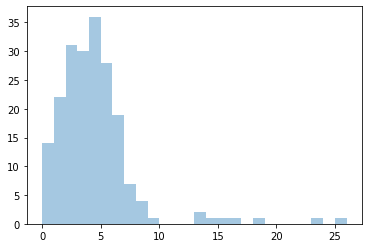

In [88]:
sns.distplot(new_mat.sum(axis=1), kde=False)

In [43]:
new_mat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [44]:
    corr_mat = np.corrcoef(new_mat, rowvar=False)

In [46]:
corr_mat[0]

array([ 1.        , -0.04166667,  0.08854167, -0.04166667, -0.04166667,
       -0.04166667, -0.04166667, -0.04166667,  0.08854167, -0.04166667,
       -0.04166667, -0.04166667,  0.08854167, -0.04166667,  0.08854167,
        0.08854167,  0.08854167, -0.04166667, -0.04166667, -0.04166667,
        0.08854167, -0.04166667, -0.04166667,  0.08854167,  0.08854167,
        0.08854167,  0.08854167, -0.04166667,  0.08854167,  0.08854167,
       -0.04166667,  0.08854167, -0.04166667, -0.04166667,  0.08854167,
       -0.04166667, -0.04166667,  0.08854167,  0.08854167,  0.08854167,
       -0.04166667, -0.04166667, -0.04166667,  0.08854167, -0.04166667,
       -0.04166667,  0.08854167,  0.08854167, -0.04166667,  0.08854167,
       -0.04166667, -0.04166667, -0.04166667,  0.08854167, -0.04166667,
       -0.04166667,  0.08854167,  0.08854167,  0.08854167,  0.08854167,
       -0.04166667, -0.04166667,  0.08854167,  0.08854167, -0.04166667,
        0.08854167, -0.04166667, -0.04166667, -0.04166667,  0.08

In [63]:
lst = np.array([1,1,5])
np.where(lst<2,lst*2,lst)

array([2, 2, 5])

In [89]:
corr_mat = np.corrcoef(new_mat, rowvar=False)

In [91]:
corr_mat[0]

array([ 1.        , -0.04166667,  0.08854167,  0.08854167, -0.04166667,
       -0.04166667,  0.08854167, -0.04166667, -0.04166667, -0.04166667,
        0.08854167, -0.04166667,  0.08854167, -0.04166667,  0.08854167,
        0.21875   , -0.04166667, -0.04166667,  0.08854167,  0.08854167,
        0.08854167, -0.04166667,  0.08854167, -0.04166667, -0.04166667,
       -0.04166667,  0.08854167,  0.08854167, -0.04166667, -0.04166667,
        0.08854167,  0.08854167, -0.04166667, -0.04166667, -0.04166667,
        0.08854167, -0.04166667,  0.08854167,  0.08854167,  0.08854167,
       -0.04166667, -0.04166667, -0.04166667,  0.08854167, -0.04166667,
        0.08854167, -0.04166667,  0.08854167,  0.08854167, -0.04166667,
        0.08854167,  0.08854167, -0.04166667, -0.04166667, -0.04166667,
        0.08854167,  0.21875   , -0.04166667, -0.04166667,  0.08854167,
       -0.04166667, -0.04166667, -0.04166667, -0.04166667,  0.08854167,
       -0.04166667, -0.04166667, -0.04166667,  0.08854167,  0.21